In [1]:
import numpy as np
import pandas
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.curdir, '..'))
from support.mecanum_calculations import *
from support.pd_support import *

In [2]:
_folder_name = "sk14_right"
_parent_folder_name = "single_cam_oct_25"

_base_pth = os.path.dirname(os.getcwd())
_base_pth = os.path.join(_base_pth, 'recording_programs', "test_data",_parent_folder_name)
_base_pth

'c:\\Users\\CMC\\Documents\\openposelibs\\pose\\armbo\\recording_programs\\test_data\\single_cam_oct_25'

In [3]:
_sensor_pth = os.path.join(_base_pth, _folder_name, "imu01.csv")
_mc_pth = os.path.join(_base_pth, "sk14",_folder_name + ".csv")
_mc_pth

'c:\\Users\\CMC\\Documents\\openposelibs\\pose\\armbo\\recording_programs\\test_data\\single_cam_oct_25\\sk14\\sk14_right.csv'

In [4]:
sk_df = pd.read_csv(_sensor_pth)
mc_df, st_time = read_df_csv(_mc_pth)
mc_df = add_datetime_col(mc_df, st_time,_name="seconds")

radius = 47.5/1000
lx = 79 #half of the distance between the wheels
ly = 122.5/2

In [12]:
sk_df

,sys_time,rust_time,e_fr,e_fl,e_rr,e_rl,rtc,mils,sync,ax,ay,az,gx,gy,gz,e_fr_av,e_fl_av,e_rr_av,e_rl_av
0,2022-10-25 15:33:30.032887,1.666692e+09,0,0,0,0,2019-01-01 05.57.12.000000 AM,1632336,0,-0.002609,0.006743,0.994345,0.337619,-0.216122,1.125558,NaN,NaN,NaN,NaN
1,2022-10-25 15:33:30.218247,1.666692e+09,0,0,0,0,2019-01-01 05.57.12.000000 AM,1632347,0,0.007400,-0.002779,0.996542,0.368153,-0.246656,1.110291,0.0,0.0,0.0,0.0
2,2022-10-25 15:33:30.218747,1.666692e+09,0,0,0,0,2019-01-01 05.57.12.000000 AM,1632357,0,-0.000168,0.001860,1.002646,0.261283,-0.277191,1.033955,0.0,0.0,0.0,0.0
3,2022-10-25 15:33:30.218747,1.666692e+09,0,0,0,0,2019-01-01 05.57.12.000000 AM,1632368,0,-0.001145,-0.004732,1.005576,0.429222,-0.353527,1.110291,0.0,0.0,0.0,0.0
4,2022-10-25 15:33:30.219248,1.666692e+09,0,0,0,0,2019-01-01 05.57.12.000000 AM,1632378,0,0.001541,0.005278,1.001181,0.337619,-0.155053,0.866016,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2022-10-25 15:33:39.732356,1.666692e+09,7279,-8005,1,-6713,2019-01-01 05.57.21.000000 AM,1642036,0,0.006424,-0.008638,1.001914,0.352886,-0.155053,1.278230,0.0,0.0,0.0,0.0
932,2022-10-25 15:33:39.742855,1.666692e+09,7279,-8005,1,-6713,2019-01-01 05.57.21.000000 AM,1642047,0,0.007645,-0.001802,0.999472,0.337619,-0.277191,1.064490,0.0,0.0,0.0,0.0
933,2022-10-25 15:33:39.753383,1.666692e+09,7279,-8005,1,-6713,2019-01-01 05.57.21.000000 AM,1642057,0,0.013992,0.003569,1.000937,0.322352,-0.170321,1.079757,0.0,0.0,0.0,0.0
934,2022-10-25 15:33:39.763938,1.666692e+09,7279,-8005,1,-6713,2019-01-01 05.57.21.000000 AM,1642068,0,0.007645,0.004057,1.001425,0.429222,-0.261924,1.125558,0.0,0.0,0.0,0.0


In [5]:
_sk_df = set_zero(sk_df)
_sk_df, _ang_column = get_angular_velocity(_sk_df)
_sk_df, _ = get_directional_velocity(_sk_df, _ang_column, radius, lx, ly)
_sk_df, _ = get_position(_sk_df)
_sk_df["sys_time"] = pd.to_datetime(_sk_df["sys_time"])

In [6]:
mc_df

,frame,seconds,center_x,center_y,center_z,lb_x,lb_y,lb_z,lt_x,lt_y,lt_z,rb_x,rb_y,rb_z,rt_x,rt_y,rt_z,time
0,0,0.00,0.362193,0.116281,0.061561,0.402159,0.152003,0.165803,0.400360,0.238935,0.167656,0.316402,0.151055,0.163587,0.314558,0.237752,0.165468,2022-10-25 15:33:27.529
1,1,0.01,0.362187,0.116236,0.061548,0.402156,0.151998,0.165803,0.400380,0.238917,0.167633,0.316402,0.151055,0.163588,0.314553,0.237759,0.165464,2022-10-25 15:33:27.539
2,2,0.02,0.362193,0.116263,0.061569,0.402159,0.151993,0.165800,0.400364,0.238922,0.167658,0.316404,0.151044,0.163600,0.314554,0.237747,0.165470,2022-10-25 15:33:27.549
3,3,0.03,0.362201,0.116279,0.061571,0.402159,0.152003,0.165794,0.400360,0.238926,0.167657,0.316416,0.151062,0.163598,0.314557,0.237754,0.165473,2022-10-25 15:33:27.559
4,4,0.04,0.362190,0.116268,0.061567,0.402160,0.152004,0.165797,0.400359,0.238923,0.167653,0.316405,0.151055,0.163579,0.314559,0.237754,0.165467,2022-10-25 15:33:27.569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,925,9.25,-0.239572,0.112648,0.058929,-0.206378,0.148260,0.165341,-0.207008,0.234756,0.167093,-0.291618,0.148322,0.157683,-0.292641,0.234940,0.158983,2022-10-25 15:33:36.779
926,926,9.26,-0.239574,0.112636,0.058921,-0.206370,0.148266,0.165344,-0.207004,0.234774,0.167095,-0.291616,0.148305,0.157670,-0.292648,0.234950,0.158978,2022-10-25 15:33:36.789
927,927,9.27,-0.239577,0.112641,0.058923,-0.206364,0.148259,0.165343,-0.207005,0.234772,0.167100,-0.291620,0.148307,0.157678,-0.292622,0.234977,0.158992,2022-10-25 15:33:36.799
928,928,9.28,-0.239579,0.112645,0.058925,-0.206364,0.148255,0.165355,-0.207014,0.234758,0.167090,-0.291607,0.148318,0.157671,-0.292647,0.234946,0.158978,2022-10-25 15:33:36.809


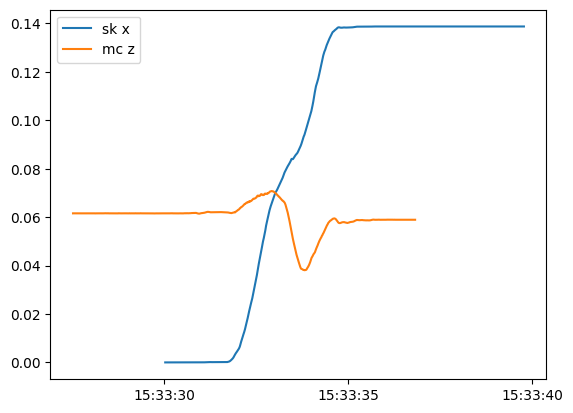

In [7]:
plt.plot(_sk_df["sys_time"], _sk_df['x_val']*-1, label = "sk x")
plt.plot(mc_df["time"], mc_df['center_z'], label = "mc z")
plt.legend()

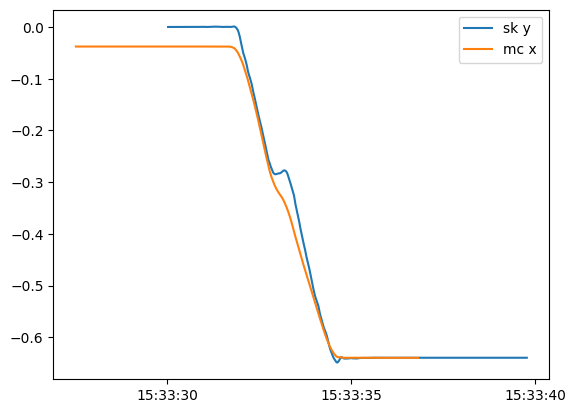

In [8]:
plt.plot(_sk_df["sys_time"], _sk_df['y_val']*-4, label = "sk y")
plt.plot(mc_df["time"], mc_df['center_x']-0.4, label = "mc x")
plt.legend()